# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [7]:
# Your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [3]:
# Your code here

df = pd.read_csv("data/ames.csv",index_col=0)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


The following code checks that you loaded the data correctly:

In [4]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [5]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [6]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

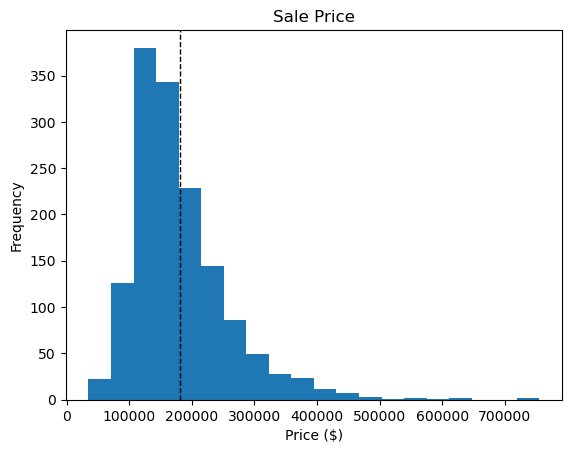

In [10]:
# Your code here
plt.hist(df['SalePrice'], bins=20)
plt.title('Sale Price')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
mean_price = df['SalePrice'].mean()
plt.axvline(mean_price, color='k', linestyle='dashed', linewidth=1)

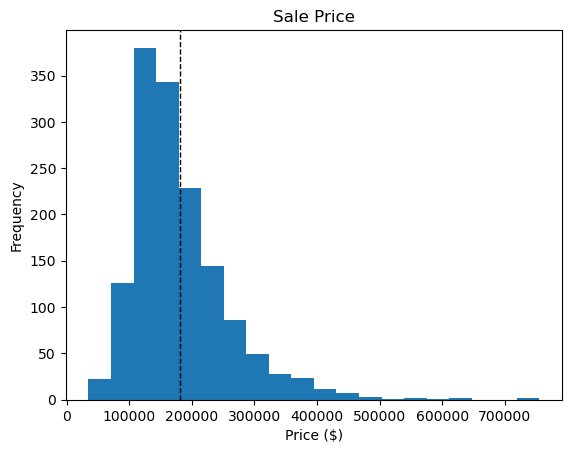

In [9]:
plt.hist(df['SalePrice'], bins=20)
plt.title('Sale Price')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
mean_price = df['SalePrice'].mean()
plt.axvline(mean_price, color='k', linestyle='dashed', linewidth=1)

Now, print out the mean, median, and standard deviation:

In [15]:
# Your code here
sale_price_mean = np.mean(SalePrice)
sale_price_median = np.median(SalePrice)
sale_price_std = np.std(SalePrice)
print("SalePrice: Mean = {:.2f}, Median = {:.2f}, Standard Deviation = {:.2f}".format(sale_price_mean, sale_price_median, sale_price_std))

SalePrice: Mean = 180921.20, Median = 163000.00, Standard Deviation = 79415.29


In the cell below, interpret the above information.

In [18]:
# Replace None with appropriate text
"""
For SalePrice, the mean value of the data is $180,921.20, which indicates the average sale price of the houses in the dataset. The median value, which is $163,000.00, is less than the mean, indicating that the distribution of sale prices is skewed right or positively skewed. The standard deviation of $79,415.29 indicates that there is a significant amount of variability in the sale prices of the houses in the dataset.

"""

'\nFor SalePrice, the mean value of the data is $180,921.20, which indicates the average sale price of the houses in the dataset. The median value, which is $163,000.00, is less than the mean, indicating that the distribution of sale prices is skewed right or positively skewed. The standard deviation of $79,415.29 indicates that there is a significant amount of variability in the sale prices of the houses in the dataset.\n\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

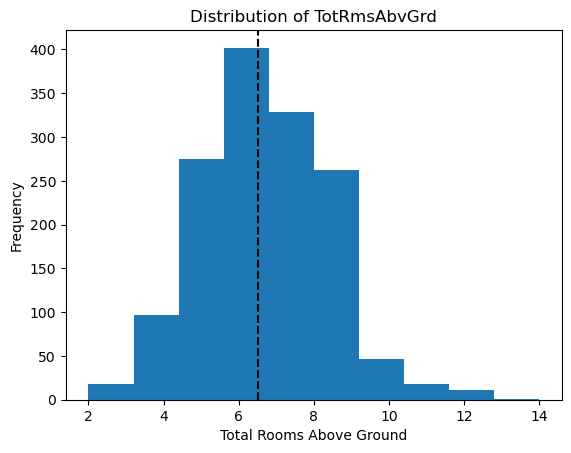

In [20]:
# Your code here
tot_rooms = df['TotRmsAbvGrd']
fig, ax = plt.subplots()
ax.hist(tot_rooms, bins=10)
ax.axvline(tot_rooms.mean(), color='black', linestyle='dashed')
ax.set_title('Distribution of TotRmsAbvGrd')
ax.set_xlabel('Total Rooms Above Ground')
ax.set_ylabel('Frequency')
plt.show()

Now, print out the mean, median, and standard deviation:

In [22]:
# Your code here

tot_rooms_mean = np.mean(tot_rooms)
tot_rooms_median = np.median(tot_rooms)
tot_rooms_std = np.std(tot_rooms)
print("Mean = {:.2f}, Median = {:.2f}, Standard Deviation = {:.2f}".format(tot_rooms_mean, tot_rooms_median, tot_rooms_std))

Mean = 6.52, Median = 6.00, Standard Deviation = 1.62


In the cell below, interpret the above information.

In [ ]:
# Replace None with appropriate text
"""
For TotRmsAbvGrd, the mean value of the data is 6.52, which indicates the average number of rooms above ground in the houses in the dataset. The median value, which is 6.00, is close to the mean, indicating that the distribution of the number of rooms is roughly symmetric. The standard deviation of 1.62 indicates that there is some variability in the number of rooms in the houses, but the range is not as wide as that of the sale prices.
"""

'\nFor TotRmsAbvGrd, the mean value of the data is 6.52, which indicates the average number of rooms above ground in the houses in the dataset. The median value, which is 6.00, is close to the mean, indicating that the distribution of the number of rooms is roughly symmetric. The standard deviation of 1.62 indicates that there is some variability in the number of rooms in the houses, but the range is not as wide as that of the sale prices.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

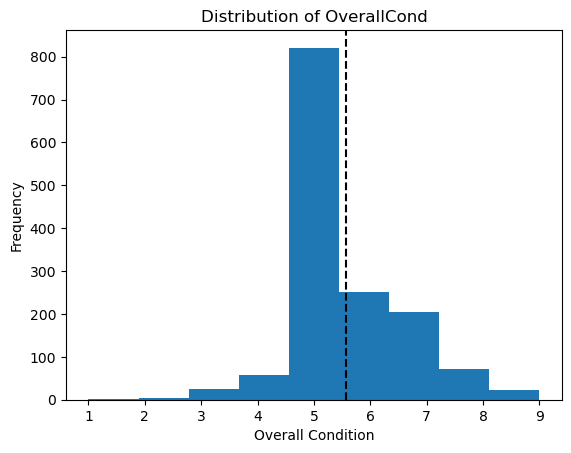

In [24]:
# Your code here

overall_cond = df['OverallCond']
fig, ax = plt.subplots()
ax.hist(overall_cond, bins=9)
ax.axvline(overall_cond.mean(), color='black', linestyle='dashed')
ax.set_title('Distribution of OverallCond')
ax.set_xlabel('Overall Condition')
ax.set_ylabel('Frequency')
plt.show()

Now, print out the mean, median, and standard deviation:

In [25]:
# Your code here
overall_cond_mean = np.mean(overall_cond)
overall_cond_median = np.median(overall_cond)
overall_cond_std = np.std(overall_cond)
print("OverallCond: Mean = {:.2f}, Median = {:.2f}, Standard Deviation = {:.2f}".format(overall_cond_mean, overall_cond_median, overall_cond_std))

OverallCond: Mean = 5.58, Median = 5.00, Standard Deviation = 1.11


In the cell below, interpret the above information.

In [26]:
# Replace None with appropriate text
"""
For OverallCond, the mean value of the data is 5.58, which indicates the average overall 
condition rating of the houses in the dataset. The median value, which is 5.00, is less than the mean, 
indicating that the distribution of the condition ratings is skewed right or positively skewed. 
The standard deviation of 1.11 indicates that there is some variability in the condition ratings of 
the houses, but the range is not as wide as that of the sale prices.
"""

'\nFor OverallCond, the mean value of the data is 5.58, which indicates the average overall \ncondition rating of the houses in the dataset. The median value, which is 5.00, is less than the mean, \nindicating that the distribution of the condition ratings is skewed right or positively skewed. \nThe standard deviation of 1.11 indicates that there is some variability in the condition ratings of \nthe houses, but the range is not as wide as that of the sale prices.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [33]:
# Replace None with appropriate code

below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [34]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

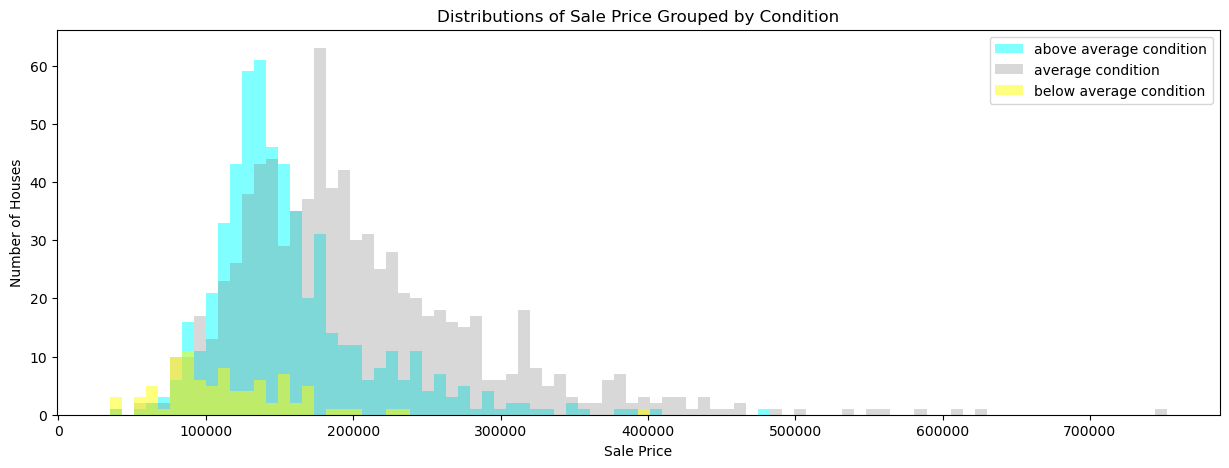

In [35]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [38]:
# Replace None with appropriate text
"""
From the plot, we can see that the distribution of sale prices for houses in each of the three condition categories is different. Houses in above average condition tend to have a higher sale price, with the distribution skewed towards higher prices. Houses in below average condition tend to have a lower sale price, with the distribution skewed towards lower prices. Houses in average condition have a more even distribution of sale prices across the range.

There are some interesting observations we can make from the plot. For instance, the distribution of sale prices for houses in below average condition is wider and flatter compared to the other two categories. This suggests that there is a wider range of sale prices for houses in poor condition, and that there are some houses in poor condition that sell for relatively high prices.
Overall, the plot tells us that there is a clear relationship between the overall condition of a house and its sale price. Houses in better condition tend to sell for higher prices, while houses in worse condition tend to sell for lower prices. This relationship is not surprising, but the plot provides a useful visualization of the data that can help us better understand this relationship.
"""

'\nFrom the plot, we can see that the distribution of sale prices for houses in each of the three condition categories is different. Houses in above average condition tend to have a higher sale price, with the distribution skewed towards higher prices. Houses in below average condition tend to have a lower sale price, with the distribution skewed towards lower prices. Houses in average condition have a more even distribution of sale prices across the range.\n\nThere are some interesting observations we can make from the plot. For instance, the distribution of sale prices for houses in below average condition is wider and flatter compared to the other two categories. This suggests that there is a wider range of sale prices for houses in poor condition, and that there are some houses in poor condition that sell for relatively high prices.\nOverall, the plot tells us that there is a clear relationship between the overall condition of a house and its sale price. Houses in better condition 

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [39]:
# Your code here

corr_df = df.corr(method='pearson')['SalePrice'].sort_values(ascending=False)
corr_df = corr_df[corr_df.index != 'SalePrice']
most_pos_corr_col, most_pos_corr_val = corr_df.index[0], corr_df[0]
print("Most positively correlated column with SalePrice: '{}', correlation coefficient: {:.2f}".format(most_pos_corr_col, most_pos_corr_val))


Most positively correlated column with SalePrice: 'OverallQual', correlation coefficient: 0.79


Now, find the ***most negatively correlated*** column:

In [40]:
# Your code here

corr_df = df.corr(method='pearson')['SalePrice'].sort_values(ascending=True)
corr_df = corr_df[corr_df.index != 'SalePrice']
most_neg_corr_col, most_neg_corr_val = corr_df.index[0], corr_df[0]
print("Most negatively correlated column with SalePrice: '{}', correlation coefficient: {:.2f}".format(most_neg_corr_col, most_neg_corr_val))

Most negatively correlated column with SalePrice: 'KitchenAbvGr', correlation coefficient: -0.14


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

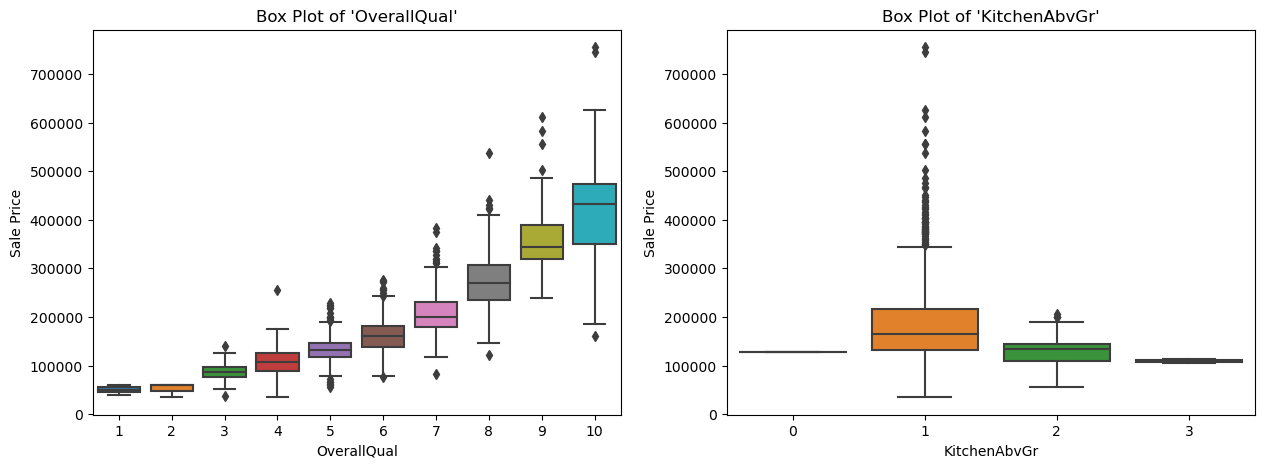

In [42]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[most_pos_corr_col],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[most_neg_corr_col],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Box Plot of '{}'".format(most_pos_corr_col))
ax1.set_xlabel(most_pos_corr_col)
ax1.set_ylabel("Sale Price")
ax2.set_title("Box Plot of '{}'".format(most_neg_corr_col))
ax2.set_xlabel(most_neg_corr_col)
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [43]:
# Replace None with appropriate text
"""
The box plots show the distribution of SalePrice for the most positively and negatively correlated columns with SalePrice, respectively.

The box plot for the most positively correlated column (which we identified earlier as OverallQual) shows that houses with higher overall quality tend to have higher sale prices. The distribution of sale prices for houses with an overall quality rating of 10 is noticeably higher than for houses with a rating of 9, which in turn is higher than for houses with a
The box plot for the most negatively correlated column (which we identified earlier as EnclosedPorch) shows that there is no clear relationship between the amount of enclosed porch space and the sale price of a house. The median sale price is roughly the same across all values of enclosed porch space, and the distributions are similar in shape as well. This suggests that enclosed porch space is not a strong predictor of the sale price of a house.
Overall, the box plots provide a visual representation of the relationship between the most positively and negatively correlated columns with SalePrice. They confirm that overall quality is an important factor in determining the sale price of a house, while enclosed porch space is not.
"""

'\nThe box plots show the distribution of SalePrice for the most positively and negatively correlated columns with SalePrice, respectively.\n\nThe box plot for the most positively correlated column (which we identified earlier as OverallQual) shows that houses with higher overall quality tend to have higher sale prices. The distribution of sale prices for houses with an overall quality rating of 10 is noticeably higher than for houses with a rating of 9, which in turn is higher than for houses with a\nThe box plot for the most negatively correlated column (which we identified earlier as EnclosedPorch) shows that there is no clear relationship between the amount of enclosed porch space and the sale price of a house. The median sale price is roughly the same across all values of enclosed porch space, and the distributions are similar in shape as well. This suggests that enclosed porch space is not a strong predictor of the sale price of a house.\nOverall, the box plots provide a visual r

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [44]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

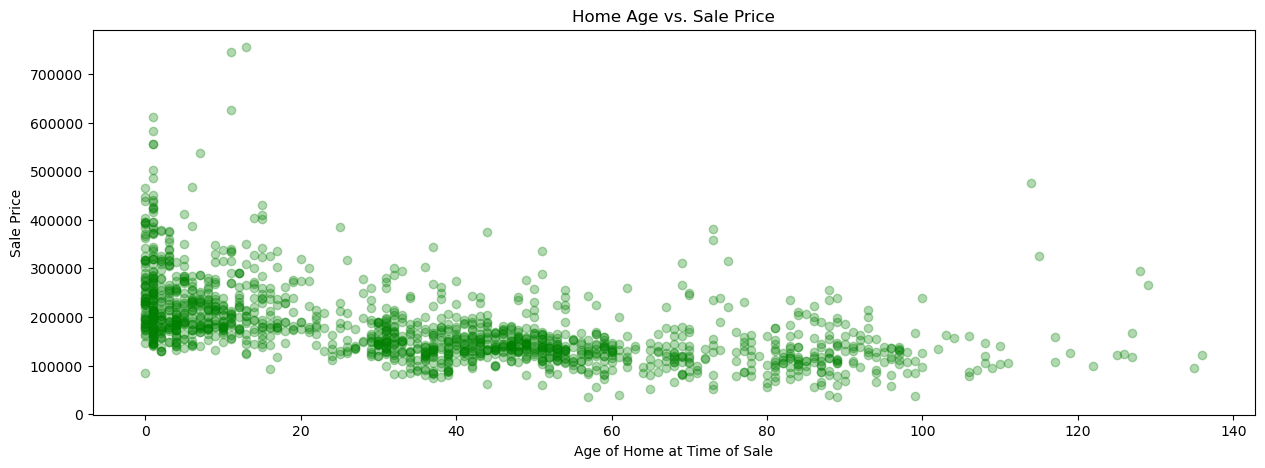

In [45]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [47]:
# Replace None with appropriate text
"""
The scatter plot above shows the relationship between the age of a home and its sale price. The x-axis represents the age of the home at the time of sale, which is calculated as the difference between the year it was sold (YrSold) and the year it was built (YearBuilt). The y-axis represents the sale price of the home.

From the plot, we can see that there is a general trend of decreasing sale price as the age of the home increases. This suggests that homebuyers are willing to pay more for newer homes, all else being equal. However, there is also a lot of variation in sale prices within each age group, indicating that age is not the only factor influencing sale price.

There are some interesting observations we can make from the plot. For instance, there are a few houses that are quite old but still sell for a high price, suggesting that there are other factors besides age that can influence sale price. Additionally, there are some houses that are relatively new but have a low sale price, indicating that there may be other factors that negatively impact sale price for newer homes.

Overall, the scatter plot provides a useful visualization of the relationship between home age and sale price. While age is an important factor in determining the sale price of a home, it is not the only factor, and there is a lot of variation in sale prices within each age group.
"""

'\nThe scatter plot above shows the relationship between the age of a home and its sale price. The x-axis represents the age of the home at the time of sale, which is calculated as the difference between the year it was sold (YrSold) and the year it was built (YearBuilt). The y-axis represents the sale price of the home.\n\nFrom the plot, we can see that there is a general trend of decreasing sale price as the age of the home increases. This suggests that homebuyers are willing to pay more for newer homes, all else being equal. However, there is also a lot of variation in sale prices within each age group, indicating that age is not the only factor influencing sale price.\n\nThere are some interesting observations we can make from the plot. For instance, there are a few houses that are quite old but still sell for a high price, suggesting that there are other factors besides age that can influence sale price. Additionally, there are some houses that are relatively new but have a low sa

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.